# Iris Decision Tree

In [11]:
%matplotlib inline
from sklearn import datasets
from sklearn import tree
import pandas as pd
import numpy as np
import seaborn as sns
import random as rnd

iris = datasets.load_iris()

df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names'] + ['target'])

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


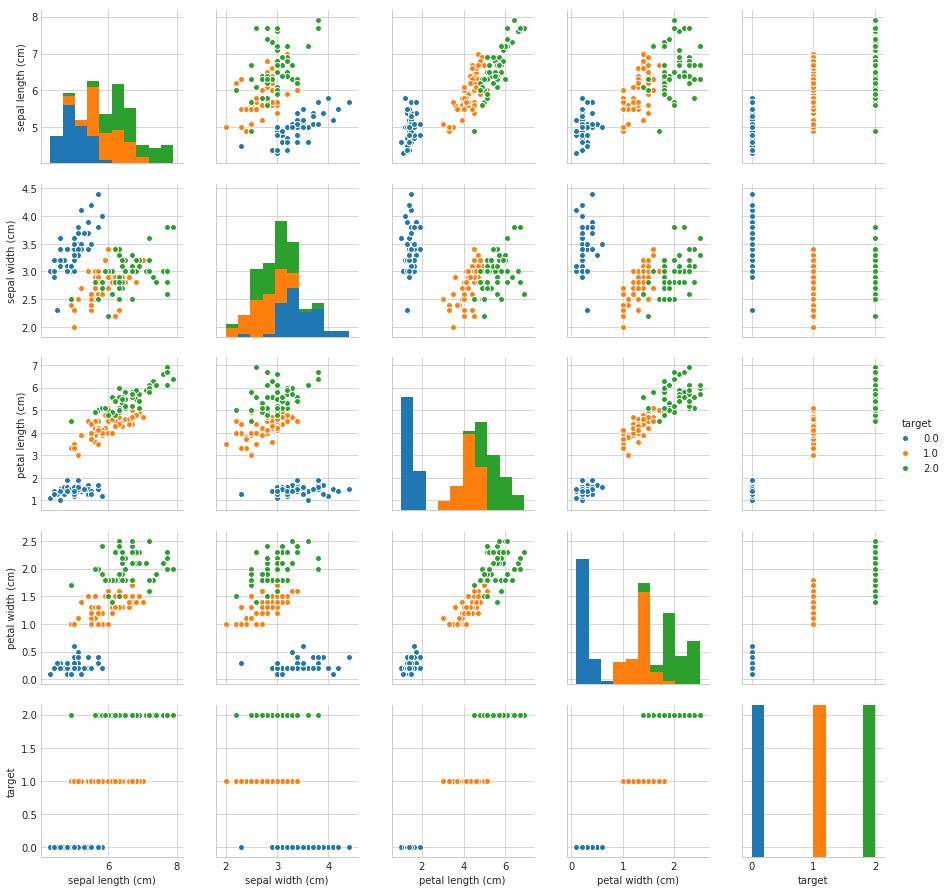

In [13]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='target')

In [14]:
X = iris.data[0:150, :]
X.shape

(150, 4)

In [15]:
Y = iris.target[0:150]
Y.shape

(150,)

In [16]:
setosa_index = rnd.randrange(0, 49)
test_setosa = [iris.data[setosa_index, :]]
X = np.delete(X, setosa_index, 0)
Y = np.delete(Y, setosa_index, 0)
test_setosa, iris.target_names[iris.target[setosa_index]], X.shape, Y.shape

([array([ 4.7,  3.2,  1.3,  0.2])], 'setosa', (149, 4), (149,))

In [17]:
virginica_index = rnd.randrange(100, 150)
test_virginica = [iris.data[virginica_index, :]]
X = np.delete(X, virginica_index, 0)
Y = np.delete(Y, virginica_index, 0)
test_virginica, iris.target_names[iris.target[virginica_index]], X.shape, Y.shape

([array([ 5.7,  2.5,  5. ,  2. ])], 'virginica', (148, 4), (148,))

In [18]:
versicolor_index = rnd.randrange(50, 99)
test_versicolor = [iris.data[versicolor_index, :]]
X = np.delete(X, versicolor_index, 0)
Y = np.delete(Y, versicolor_index, 0)
test_versicolor, iris.target_names[iris.target[versicolor_index]], X.shape, Y.shape

([array([ 5.5,  2.4,  3.8,  1.1])], 'versicolor', (147, 4), (147,))

In [19]:
# Decision Tree Classifier Model
model_tree = tree.DecisionTreeClassifier()

# Training the model
model_tree.fit(X, Y)

pred_tree_setosa = model_tree.predict(test_setosa)
print('Decision Tree predicts {} for test_setosa'
      .format(iris.target_names[pred_tree_setosa]))

Decision Tree predicts ['setosa'] for test_setosa


In [20]:
pred_tree_virginica = model_tree.predict(test_virginica)
print('Decision Tree predicts {} for test_virginica'
      .format(iris.target_names[pred_tree_virginica]))

Decision Tree predicts ['virginica'] for test_virginica


In [21]:
pred_tree_versicolor = model_tree.predict(test_versicolor)
print('Decision Tree predicts {} for test_versicolor'
      .format(iris.target_names[pred_tree_versicolor]))

Decision Tree predicts ['versicolor'] for test_versicolor


In [22]:
# select features
y = df['target']
X = df[['petal length (cm)', 'petal width (cm)']]
# split data randomly into 70% training and 30% test
from sklearn import tree, metrics, model_selection, preprocessing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

In [25]:
X_test.shape

(45, 2)

In [29]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)
# use the model to make predictions with the test data
y_pred = dtree.predict(X_test)
y_pred, y_test

(array([ 2.,  1.,  0.,  2.,  0.,  2.,  0.,  1.,  1.,  1.,  2.,  1.,  1.,
         1.,  1.,  0.,  1.,  1.,  0.,  0.,  2.,  1.,  0.,  0.,  2.,  0.,
         0.,  1.,  1.,  0.,  2.,  1.,  0.,  2.,  2.,  1.,  0.,  2.,  1.,
         1.,  2.,  0.,  2.,  0.,  0.]), 114    2
 62     1
 33     0
 107    2
 7      0
 100    2
 40     0
 86     1
 76     1
 71     1
 134    2
 51     1
 73     1
 54     1
 63     1
 37     0
 78     1
 90     1
 45     0
 16     0
 121    2
 66     1
 24     0
 8      0
 126    2
 22     0
 44     0
 97     1
 93     1
 26     0
 137    2
 84     1
 27     0
 127    2
 132    2
 59     1
 18     0
 83     1
 61     1
 92     1
 112    2
 2      0
 141    2
 43     0
 10     0
 Name: target, dtype: float64)

# Evaluate the model's performance

In [31]:
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 1
Accuracy: 0.98


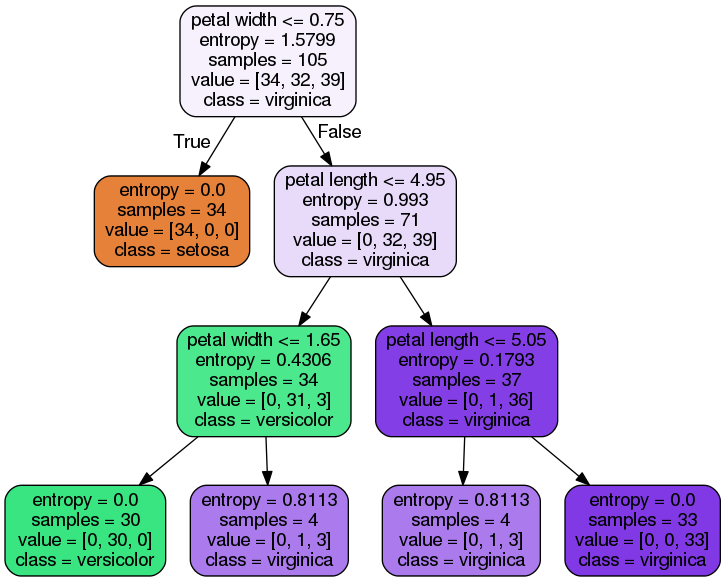

In [15]:
from IPython.display import Image, display
import numpy as np, pandas as pd, matplotlib.pyplot as plt, pydotplus
dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,
                                feature_names=['petal length', 'petal width'],  
                                class_names=['setosa', 'versicolor', 'virginica'])
graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png()))
#for the plot you should have dot and graphviz installed.